# Exploratory Data Analysis - Dependências
Recursos presentes nas escolas

#### Imports

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from unidecode import unidecode

pd.set_option('display.max_columns', None)

## Carregar dados

In [6]:
PATH = '../data/raw'

### Dados das coordenadas

In [7]:
data = pd.read_csv(os.path.join(PATH, '06_Escolas_Dependencias.csv'), sep=';')
print(data.shape)
data.head()

(5608, 172)


,NOMEDEP,DE,MUN,DISTR,CODESC,NOMESC,TIPOESC,TIPOESC_DESC,SITUACAO,SALAS_AULA,SALAS_ED_INF,SALAS_ED_ESP,SALAS_ED_ART,SALA_RECURSO,TOT_SALAS_AULA,AUDITORIO,ANFITEATRO,TEATRO,CANTINA,COPA,COZINHA,REFEITORIO,DEPOSITO_ALIMENTOS,DESPENSA,TOT_DESPENSA,SALA_LEITURA,BIBLIOTECA,TOT_SALA_LEITURA,QUADRA_COBERTA,QUADRA_DESCOBERTA,GINASIO,TOT_QUADRA,QUADRA_AREIA,QUADRA_GRAMA,CAMPO_FUTEBOL,GABINETE_DENTARIO,CONSULTORIO_MEDICO,ENFERMARIA,AMBULATORIO,ALMOXARIFADO,ARQUIVO,REPROGRAFIA,SALA_GREMIO,DIRETORIA,VICEDIRETORIA,SALA_PROF,SECRETARIA,SALA_ORIENT_ED,SALA_COORD_PEDAG,PATIO_COBERTO,PATIO_DESCOBERTO,ZELADORIA,VESTIARIO_FEM,VESTIARIO_MASC,TOT_VESTIARIO,VIDEOTECA,SALA_TV,LAB_INFO,LAB_CIENCIAS,LAB_FISICA,LAB_QUIMICA,LAB_BIOLOGIA,LAB_CIENCIA_FISICA_BIOLOGICA,TOT_LAB_CIENCIA,LAB_LINGUAS,LAB_MULTIUSO,OFICINA,PLAYGROUND,DORMITORIO,BERCARIO,SANITARIO_ADEQ_PRE,SANITARIO_ADEQ_PRE_FEM,SANITARIO_ADEQ_PRE_MASC,SANITARIO_ADEQ_DEF,SANITARIO_ADEQ_DEF_FEM,SANITARIO_ADEQ_DEF_MASC,SANITARIO_AL_MASC,SANITARIO_AL_FEM,TOT_SANITARIO_AL,SANITARIO_FUNC_FEM,SANITARIO_FUNC_MASC,TOT_SANITARIO_FUNC,DEPEND_ADEQ_DEF,SALA_ED_FISICA,PISCINA,PORTARIA,SALA_PROG_ESC_FAMILIA,BRINQUEDOTECA,FRALDARIO,LACTARIO,LAVANDERIA,SOLARIO,SALA_ESPERA,SALA_INSPETOR,SALA_REUNIAO,TESOURARIA,SALA_REFORCO,SALA_DIRETOR_TECNICO,GARAGEM_ONIBUS,SALA_FISIOTERAPIA,SALA_PSICOLOGIA,SALA_FONOAUDIOLOGIA,SALA_EVENTOS,SALA_ASSIST_SOCIAL,SALA_TERAPIA_EDUC,ABATEDOURO,ALOJAMENTO_FEM,ALOJAMENTO_MASC,TOT_ALOJAMENTO,AREA_SERVICO,BAZAR,CASA_MAQUINA,CASA_FUNC,CHURRASQUEIRA,DEPOSITOS_CEREAIS,ELEVADOR,ESTACIONAMENTO,ESTUFA,GALPAO_AVES_CORTE,GALPAO_AVES_POSTURA,GALPAO_BOVINOS_LEITE,GALPAO_CUNICULTURA,GALPAO_MAQ_AGRICOLA,GALPAO_OVINOS_CAPRINOS,GALPAO_SUINO,GRAFICA,HORTA,LAB_DIDATICA,LAB_JUNIOR,LAB_ENFERMAGEM,LAB_ESTETICA,LAB_PSICOPEDAGOGIA,LAB_TURISMO,LAVATORIO,MANGUEIRA,MINHOCARIO,PACKING_HOUSE,POMAR,PSICULTURA,RECEPCAO,SALA_ATENDIMENTO,SALA_ATEND_PSICOLOGICO,SALA_AUX_COORDENACAO,SALA_DADOS,SALA_DEP_PESSOAL,SALA_ED_RELIGIOSA,SALA_ENERGIA_ELETRICA,SALA_ENTRETENIMENTO,SALA_ESTAGIO,SALA_GINASTICA,SALA_INSUMO_AGRICOLA,SALA_INSUMO_VETERINARIO,SALA_MARKETING,SALA_MATRICULA,SALA_MUSICA,SALA_POS_GRADUACAO,SALA_ORDENHA,SALA_PROC_PROD_AGROPECUARIOS,SALA_SEGURANCA,SALA_TELEFONIA,SALA_FINANCEIRO,SALA_PASTORAL,SALA_RESERV_AGUA,SERVIDOR,SILO,VARANDA,VIVEIRO,SALA_REORG_NEURO,SALA_TERAPIA_OCUP,SALA_SERIGRAFIA,SALA_MARCENARIA,QUIOSQUE
0,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,985429,CEL JTO A EE FLEURIDES CAVALINI MENECHINO PROFA,6,CEL,Ativa,5,0,0,0,0,5,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31045,DURVALINO GRION PROF,8,EE,Ativa,9,0,0,0,0,9,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2,1,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31112,FLEURIDES CAVALLINI MENECHINO PROFA,8,EE,Ativa,12,0,0,0,1,13,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,5,1,0,0,1,1,1,1,0,1,2,1,1,1,1,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,2,3,5,1,1,2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,16,0,0,0,2,18,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,2,1,0,0,1,1,1,1,0,1,2,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,4,1,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Distribuição dos atributos totalizados

In [8]:
qtd_total = data.select_dtypes(np.number).drop(['CODESC', 'TIPOESC'], axis=1).sum()

In [9]:
qtd_total.head()

SALAS_AULA      63994
SALAS_ED_INF        5
SALAS_ED_ESP      155
SALAS_ED_ART      392
SALA_RECURSO     1654
dtype: int64

### Atributos que nenhuma escola atende

In [10]:
qtd_total_zero = qtd_total[qtd_total == 0]
print('Qtd:', qtd_total_zero.shape[0])

Qtd: 34


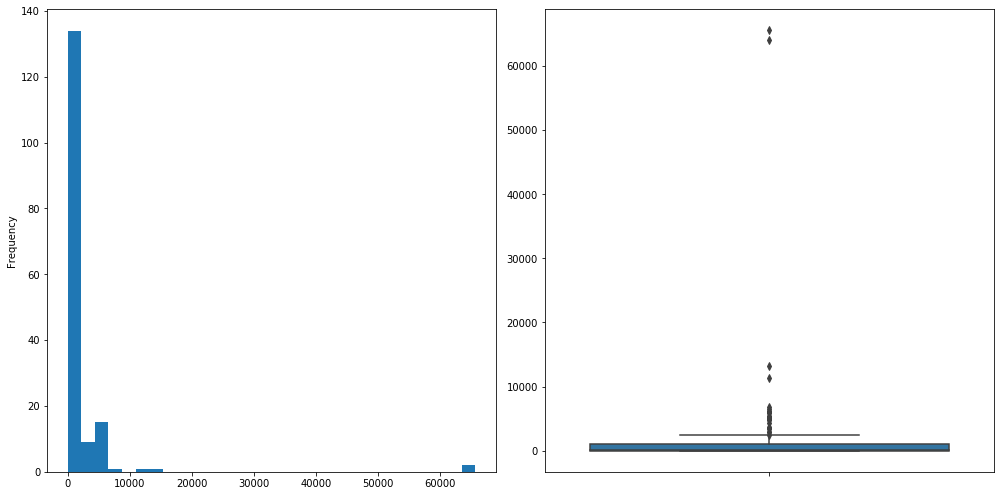

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
qtd_total.plot(kind='hist', bins=30, ax=axs[0])
sns.boxplot(qtd_total, orient='vertical', ax=axs[1])
plt.tight_layout()

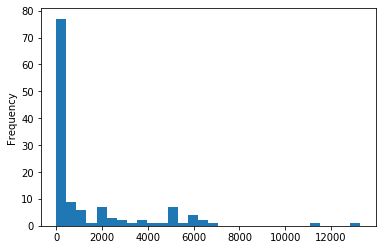

In [12]:
## Filtrando alguns valores (Maximos e zeros)
qtd_total[(qtd_total > 0) & (qtd_total < 50000)].plot(kind='hist', bins=30)

### Seleção de alguns atributos

In [13]:
list_to_filter = ['CODESC', 'NOMESC', 'TIPOESC','TIPOESC_DESC','SITUACAO','SALAS_AULA','SALAS_ED_INF','SALA_RECURSO','TOT_SALAS_AULA','CANTINA','COPA','REFEITORIO','SALA_LEITURA','TOT_SALA_LEITURA','TOT_QUADRA','SALA_PROF','PATIO_COBERTO','PATIO_DESCOBERTO','TOT_VESTIARIO','LAB_INFO','LAB_CIENCIAS','LAB_CIENCIA_FISICA_BIOLOGICA','TOT_LAB_CIENCIA','LAB_MULTIUSO','OFICINA','DORMITORIO','SANITARIO_ADEQ_DEF','SANITARIO_AL_MASC','SANITARIO_AL_FEM','TOT_SANITARIO_AL','TOT_SANITARIO_FUNC','DEPEND_ADEQ_DEF','SALA_ED_FISICA','SALA_PROG_ESC_FAMILIA','BRINQUEDOTECA','FRALDARIO','SALA_REFORCO','TOT_ALOJAMENTO','AREA_SERVICO','LAB_DIDATICA','LAB_PSICOPEDAGOGIA','SALA_ATENDIMENTO','SALA_ATEND_PSICOLOGICO','SALA_ENTRETENIMENTO']

In [14]:
data = data[list_to_filter]
qtd_total = data.select_dtypes('int').drop(['CODESC', 'TIPOESC'], axis=1).sum()
qtd_total

SALAS_AULA                      63994
SALAS_ED_INF                        5
SALA_RECURSO                     1654
TOT_SALAS_AULA                  65653
CANTINA                          2882
COPA                             1057
REFEITORIO                       2990
SALA_LEITURA                     4818
TOT_SALA_LEITURA                 4906
TOT_QUADRA                       6245
SALA_PROF                        5351
PATIO_COBERTO                    5299
PATIO_DESCOBERTO                 2512
TOT_VESTIARIO                    2116
LAB_INFO                         4985
LAB_CIENCIAS                      409
LAB_CIENCIA_FISICA_BIOLOGICA      852
TOT_LAB_CIENCIA                  1850
LAB_MULTIUSO                      602
OFICINA                           106
DORMITORIO                        158
SANITARIO_ADEQ_DEF               2123
SANITARIO_AL_MASC                6497
SANITARIO_AL_FEM                 6781
TOT_SANITARIO_AL                13278
TOT_SANITARIO_FUNC              11310
DEPEND_ADEQ_

### Remover atributo presente apenas em 1% das escolas

In [15]:
attributes_to_remove = qtd_total[qtd_total < data.shape[0] / 100].index
attributes_to_remove

Index(['SALAS_ED_INF', 'FRALDARIO', 'TOT_ALOJAMENTO', 'LAB_DIDATICA',
       'LAB_PSICOPEDAGOGIA', 'SALA_ATEND_PSICOLOGICO'],
      dtype='object')

In [16]:
data.drop(attributes_to_remove, axis=1, inplace=True)

## Quantidade de Salas

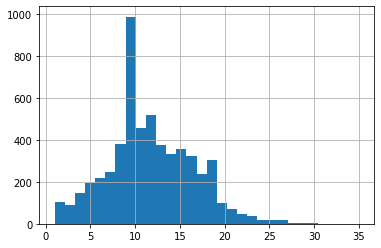

In [17]:
data['TOT_SALAS_AULA'].hist(bins=30)

## Exportar dados

In [18]:
data.to_csv('../data/processed/dependencias.csv', index=False)